# 회귀분석
* 가장 기본적이고, 중요한 통계적 모형
* 모형 = (함수 또는 방정식) + (확률분포)

## 선형모형
* 여기서 우리의 포커스는 선형모형을 회귀분석하는 것에 있음.  
* 선형 = 우리의 관심인 변수(여기서는 $\beta_i$)가 덧셈과 상수배로 이뤄져 있다는 뜻  
* 모든 고전적 통계모형의 기본이라고 할 수 있음.  
* 변수의 갯수에 따라 단순선형모형과 다중선형모형으로 나눌 수 있음.  

## 무엇을 할 수 있는가?
    - x가 주어질 때, Y의 평균을 파악해 미래를 예측 (추정의 영역)
    - Y와 x의 관계를 파악. (가설검정의 영역)

물론, 다양한 머신러닝 기법의 등장으로 선형모형만으로 추정을 하는 것은 어리석은 일.  
그러나 그럼에도 불구하고 여전히...

## 왜 선형모형인가?
    - 해석이 쉬움 = 검정이 가능함
    - 추정 과정에 너무 많은 힘을 기울이지 않아도 됨.

# 단순회귀
다음과 같은 선형모형을 단순회귀모형이라고 함.

$$
Y = \beta_0 + \beta_1x + \epsilon \\[5pt]
\epsilon \sim N(0, \sigma)
$$

* $Y$ : 종속변수. 기본적인 선형모형에서는 항상 연속형 데이터.
* $x$ : 독립변수. 연속형 데이터와 이산형 데이터 모두가 될 수 있음.
* $\epsilon$ : 오차항. 확률변수.

## 단순회귀의 가정
> 단순회귀모형은 가정을 가지고 있음.
1. 등분산성 : 모든 분산은 같음.
2. 정규성 : 오차항은 무조건 정규분포, 평균이 0, 분산은 $\sigma^2$를 따름.
3. 선형성 : y와 x는 선형이어야 함.
4. 독립성 : 각 x들은 서로 독립.

단순회귀모형이라면 기본적으로 이 가정들을 무조건 만족해야 함.

## 단순회귀의 추정
$$
Y = \beta_0 + \beta_1x + \epsilon \\[5pt]
\epsilon \sim N(0, \sigma)
$$

무엇을 추정하는가? $\beta_0$와 $\beta_1$, 그리고 $\sigma^2$  
어떻게 추정하나요? 빈도주의를 따른다는 가정하에, 여러가지 방법이 있음.  
1. OLS (ordinary least square)
2. mle (maximum likelihood estimation)
3. mme (method of moments)

우리의 단순회귀가 4가지 가정을 만족한다고 했을 때, OLS를 쓸 수 있음.

## OLS의 원리
![sse](../../_files/regression_sse.png)

데이터(오렌지색 점)과 회귀선, 그리고 평균($\bar{Y}$)를 보자.  
* 데이터와 $\bar{Y}$ 사이의 거리를 T(Total)라고 한다. 데이터와 전체 평균 간의 차이라고 보면 된다.
* 데이터와 회귀선 사이의 거리를 E(Error) 라고 한다. 
* 회귀선과 $\bar{Y}$ 사이의 거리를 R(Regress) 라고 한다.

E는 회귀선을 통해 설명된 부분이다. 반면, E는 회귀선으로도 설명할 수 없는 부분이다.  
우리의 목표는 회귀직선으로 최대한 많은 것을 설명하게 하는 것.  
따라서 모든 데이터의 E를 줄이는 방향으로 회귀직선을 설정해야 한다.  
회귀직선을 설정한다 == y절편($\beta_0$)과 기울기($\beta_1$)을 구하는 것!

어떻게 모든 데이터의 E를 계산할 것인가?
* 데이터 - (회귀선의 Y값)이 음수가 될 수도 있다. 
* 그런데, 우리는 거리를 계산해야 하므로 음수가 나와서는 안됨.
* 따라서 E를 제곱하고(Squared), 그리고 전부 더한다(sum).
그래서 이를 Sum of Squared Error, SSE라고 한다.

그럼, SSE를 어떻게 만들어야 하는가?
$$
f(\beta_0, \beta_1) = \sum_{i=1}^{n}~(Y_i - (\beta_0 + \beta_1x_i))^2
$$

이 함수을 우리는 손실함수(loss function)이라고도 한다.

여기에서 어떻게 SSE를 최소화할 것인가? 편미분을 활용하면 된다.
$$
\frac{\partial}{\partial \beta_0}~f(\beta_0, \beta_1) = 0 \\[10pt]
\frac{\partial}{\partial \beta_1}~f(\beta_0, \beta_1) = 0
$$

이를 이용해 $\beta_0$, $\beta_1$을 구한다.

또한, 이 SSE를 이용해서 $\sigma^2$ 역시 추정가능하다.
$$
\sigma^2 = \frac{SSE}{n-2}
$$

## 적합성 여부 : 결정계수
* 우리가 구한 회귀모형이 얼마나 좋은지 알 수 있을까?
* 일단 회귀모형을 적합성을 수치적인 지표로 따져보자.
* 여러가지 지표 중 대표적인 지표가 바로 결정계수이다.

결정계수는 다음과 같이 계산한다.

$$
R^2 = 1 - \frac{SSE}{SST}
$$

* 즉, 이 값은 종속 변수의 변동 중에서 회귀 모델이 설명할 수 있는 비율을 나타낸다.
* 결정계수는 회귀 모델이 데이터의 변동성을 얼마나 잘 설명하는지를 측정.

**<결정계수의 해석>**
- $R^2$ 값은 0과 1 사이의 값을 가지며, 모델의 적합도를 나타낸다.
- 만약 $R^2 = 1$이면, 회귀 모델이 모든 변동성을 설명한다. 불가능한 이야기라고 봐도 되며, 데이터의 조작을 의심할 필요가 있다.
- 너무 0에 가깝다면, 해당 모델은 의미가 없다는 이야기이다.
  
그러나 결정계수는 완벽하지 않다.
* 값이 높다고 해서 모델이 반드시 좋다고 보장할 수는 없다. 모델의 적합도만을 평가하기에, 과적합 여부를 전혀 판단할 수 없다.
* 결정계수만 가지고는 유의성, 정확성과 신뢰성 등은 판단할 수 없다.
* 그래서 가설검정을 진행한다.

## 단순회귀의 검정
통계적 검정은 언제나 같은 과정을 거친다.
1. 가설의 설정
2. 유의수준 $\alpha$의 설정
3. 검정통계량의 설정
4. 검정하기
    1. p-value < $\alpha$ 면 기각.
    2. 검정통계량 T > 임계값(critical value) 면 기각

**<t검정>**
* 단순회귀에서는 주로 t검정을 진행한다.
* 이 경우, 검정통계량이 따르는 분포는 t분포가 된다.  
* 가설의 종류에 따라서 단측가설, 양측가설이 될 수 있으며 t분포는 둘 다 할 수 있다.

## 주로 나오는 검정
1. $H_0 : \beta_0 = a$ vs $H_1 : \beta_0 \neq a$ (양측검정)
2. $H_0 : \beta_0 = a$ vs $H_1 : \beta_0 > a$ (단측검정)

# 코드 예시
* scikit-learn의 데이터셋을 가지고 단순회귀를 진행
* 단순히 추정만을 하지 않는 것을 목표로 함.

## 1. 불러오기

In [12]:
# 필요한 패키지 불러오기
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = load_diabetes()
X = data.data
y = data.target

# 데이터프레임으로 변환
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

## 2. EDA

In [16]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [17]:
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


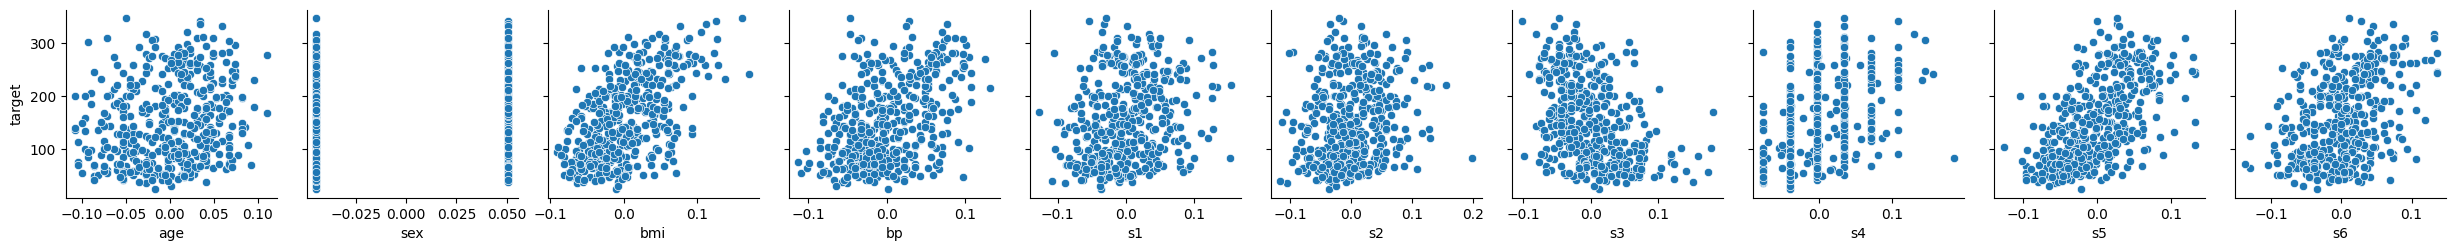

In [19]:
# 시각화
sns.pairplot(df, x_vars=data.feature_names, y_vars=['target'])
plt.show()

## 3. 회귀계수 추정

In [20]:
# 단순 회귀 분석을 위한 데이터 선택
X = df[['bmi']]  # 단일 특징
y = df['target']

# 상수 항 추가
X = sm.add_constant(X)

# 회귀 모형 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           3.47e-42
Time:                        12:06:30   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.0

## 4. 패키지 없이 OLS

In [21]:
def ols(X, y):
    # X는 상수 항이 추가된 데이터
    # y는 종속 변수
    XtX = np.dot(X.T, X)
    XtX_inv = np.linalg.inv(XtX)
    XtY = np.dot(X.T, y)
    beta = np.dot(XtX_inv, XtY)
    return beta

# OLS 회귀 추정
beta = ols(X.values, y.values)

# 회귀 계수 출력
print(f'Intercept (beta0): {beta[0]}')
print(f'Slope (beta1): {beta[1]}')

# 예측값 계산
y_pred = np.dot(X, beta)

# 잔차
residuals = y - y_pred
squared_residuals = residuals ** 2

# SSE, SSR, SST 계산
SSE = np.sum(squared_residuals)
SST = np.sum((y - np.mean(y)) ** 2)
SSR = SST - SSE

# R^2 값 계산
R2 = 1 - (SSE / SST)

print(f'SSE: {SSE}')
print(f'SSR: {SSR}')
print(f'SST: {SST}')
print(f'R^2: {R2}')

Intercept (beta0): 152.13348416289617
Slope (beta1): 949.4352603840385
SSE: 1719581.8107738825
SSR: 901427.3136605066
SST: 2621009.124434389
R^2: 0.3439237602253802


## 5. 신뢰구간 계산

In [22]:
# 신뢰구간 계산
conf = model.conf_int()
print(f'Confidence Intervals:\n{conf}')

Confidence Intervals:
                0            1
const  146.289375   157.977593
bmi    826.569908  1072.300613


## 6. 회귀계수 검정

In [24]:
# 회귀 계수 검정
print(f'Beta0 (Intercept) t-test p-value: {model.pvalues.iloc[0]}')
print(f'Beta1 (Slope) t-test p-value: {model.pvalues.iloc[1]}')

Beta0 (Intercept) t-test p-value: 2.4528739774571257e-187
Beta1 (Slope) t-test p-value: 3.466006445167252e-42
